## __Using pandas to Import and Manipulate Data__


Set up Environment by importing pandas and matplotlib: 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Read and import the DataFrame (while double checking the first 5 rows):

In [11]:
data = pd.read_csv("./PythonCSV/Titanic_E11_1.csv")
print(data.head(), "\n")    # Print the first 5 rows of the DataFrame

   Passenger Class   Sex    Age Survived
0          1   3rd  Male  Child       No
1          2   3rd  Male  Child       No
2          3   3rd  Male  Child       No
3          4   3rd  Male  Child       No
4          5   3rd  Male  Child       No 



Set up DataFrame: 

In [12]:
totalCount = data.groupby(['Class', 'Sex', 'Age']).size().reset_index(name='totalCount')        
survivorCount = data.loc[data['Survived']== 'Yes'].groupby(['Class', 'Sex', 'Age']).size().reset_index(name='survivorCount')        # Filter the data using .loc to find the passengers who survived. Follow a similar process as above to group and name the column. 

mergedData = pd.merge(totalCount, survivorCount, on=['Class', 'Sex', 'Age'], how='left')        # Merge the DataFrames (totalCount and survivorCount) on category with pandas merge function. Functions similar to a left join in SQL. 
mergedData['survivalRate'] = mergedData['survivorCount'] / mergedData['totalCount']     

print("\nSurvival rates by class, sex, and age:")      
display(mergedData)


Survival rates by class, sex, and age:


,Class,Sex,Age,totalCount,survivorCount,survivalRate
0,1st,Female,Adult,144,140,0.972222
1,1st,Female,Child,1,1,1.000000
2,1st,Male,Adult,175,57,0.325714
3,1st,Male,Child,5,5,1.000000
4,2nd,Female,Adult,93,80,0.860215
5,2nd,Female,Child,13,13,1.000000
6,2nd,Male,Adult,168,14,0.083333
7,2nd,Male,Child,11,11,1.000000
8,3rd,Female,Adult,165,76,0.460606
9,3rd,Female,Child,31,14,0.451613


Graph 1: Bar Chart (using matplotlib) to show the Survival Rates grouped by Category: 

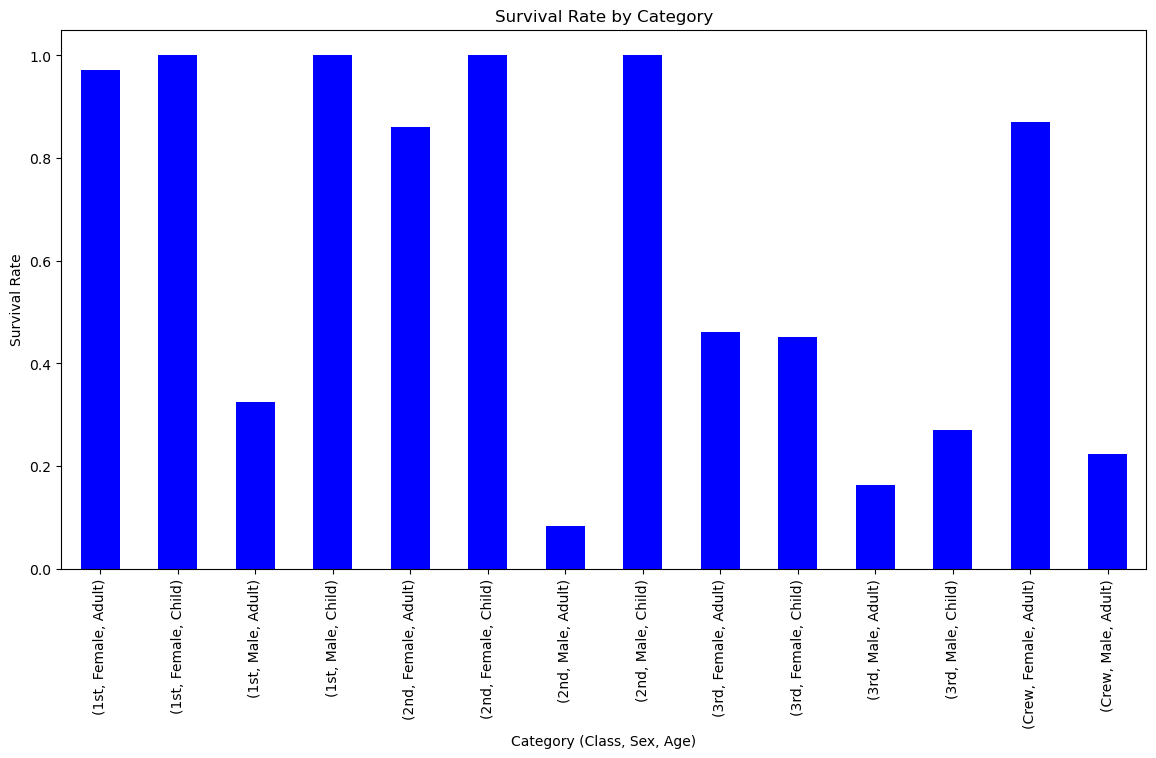

In [13]:
plt.figure(figsize=(14, 7))    
groupedData = mergedData.groupby(['Class', 'Sex', 'Age'])['survivalRate'].mean()       
groupedData.plot.bar(color='blue')     
plt.title('Survival Rate by Category')      
plt.xlabel('Category (Class, Sex, Age)')       
plt.ylabel('Survival Rate')        
plt.show()     

Graph 2: Bar Chart (using matplotlib) to show the average Survival Rates grouped by Sex: 

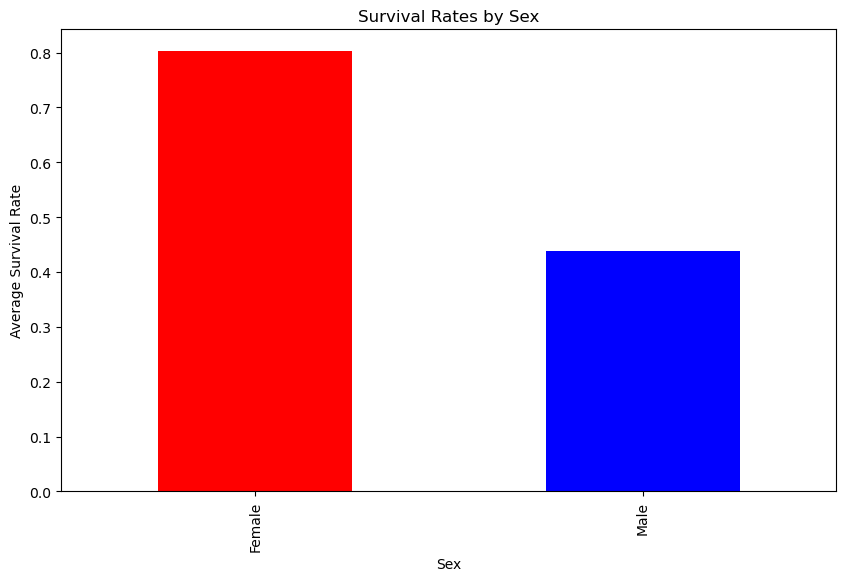

In [14]:
plt.figure(figsize=(10, 6))     
mergedData.groupby('Sex')['survivalRate'].mean().plot.bar(x='Sex', y='survivalRate', color=['red', 'blue'])     # Group mean survival rates by Sex
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Survival Rate')
plt.show()

Graph 3: Bar Chart (using matplotlib) to show the average Survival Rates grouped by Class: 

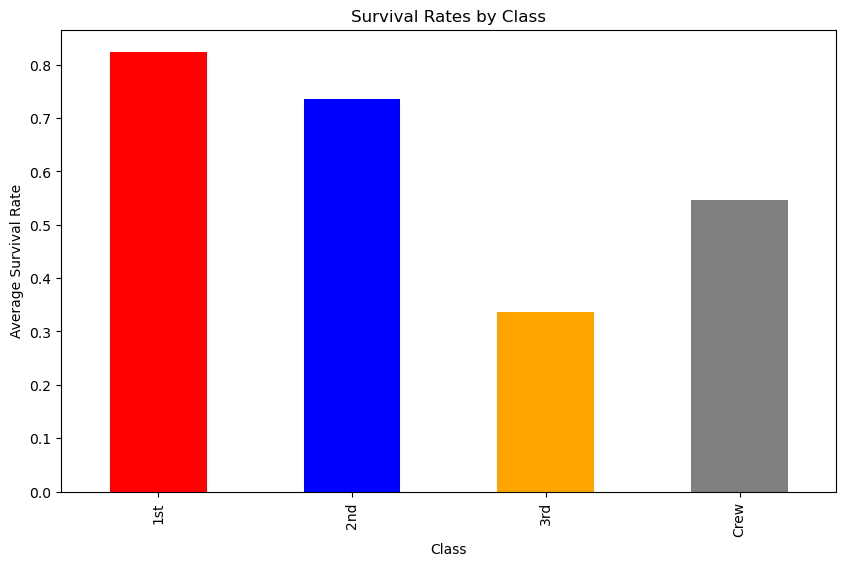

In [15]:
plt.figure(figsize=(10, 6))
mergedData.groupby('Class')['survivalRate'].mean().plot.bar(x='Class', y='survivalRate', color=['red', 'blue', 'orange', 'gray'])       # Group mean survival rates by class
plt.title('Survival Rates by Class')
plt.xlabel('Class')
plt.ylabel('Average Survival Rate')
plt.show()

Graph 4: Bar Chart (using matplotlib) to show the average Survival Rates grouped by Age:

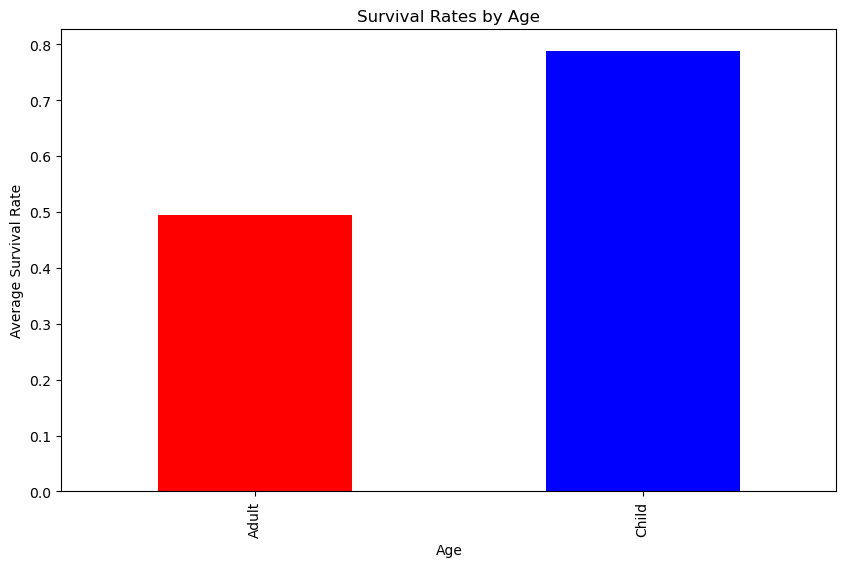

In [16]:
plt.figure(figsize=(10, 6))
mergedData.groupby('Age')['survivalRate'].mean().plot.bar(x='Age', y='survivalRate', color=['red', 'blue'])     # Group mean survival rates by Age. 
plt.title('Survival Rates by Age')
plt.xlabel('Age')
plt.ylabel('Average Survival Rate')
plt.show()


### 1) What category of person was most likely to survive? (Maximum Survival Rate from Merged DataFrame)

In [17]:
maxSurvivalRate = mergedData['survivalRate'].max()      # Calculate to find the maximum value of survival rate from the mergedData DataFrame
mostLikely = mergedData.loc[mergedData['survivalRate'] == maxSurvivalRate]      # Select all rows from mergedData that are equal to the max survival rate
print("\nCategory most likely to survive:")     
print(mostLikely)


Category most likely to survive:
  Class     Sex    Age  totalCount  survivorCount  survivalRate
1   1st  Female  Child           1              1           1.0
3   1st    Male  Child           5              5           1.0
5   2nd  Female  Child          13             13           1.0
7   2nd    Male  Child          11             11           1.0


### 2) What category of person was least likely to survive? (Minimum Survival Rate from Merged DataFrame)

In [18]:
minSurvivalRate = mergedData['survivalRate'].min()      # Calculate to find the minimum value of survival rate from the mergedData DataFrame
leastLikely = mergedData.loc[mergedData['survivalRate'] == minSurvivalRate]     # Select all rows from mergedData that are equal to the min survival rate
print("\nCategory least likely to survive:")       
print(leastLikely)


Category least likely to survive:
  Class   Sex    Age  totalCount  survivorCount  survivalRate
6   2nd  Male  Adult         168             14      0.083333


# __Analysis of Data:__

Throughout the code, I was able to come to the conclusion that the category of person most likely to survive was male and female children in the 1st or 2nd class (category 1, 3, 5 and 7 from my analysis). All 4 of these categories had a survival rate of 100%. With this, I noticed these categories didn't have many people (totalCount was low), and I began to think the data may be skewed in a sense, so I made graphs grouped by Sex, Age, and Class. 

As you can see in the bar charts above, females average survival rate (.80) throughout the data was significantly higher than males (.45). Children were also significantly more likely to survive opposed to adults with an average survival rate of about .80 compared to .50. Regarding class, 1st and 2nd class were both on the higher end of average survival rates of .75-.85, while 3rd class was .35 and the crew was .55. All these numbers make sense because the passengers likely tried to save children and women first when the ship began sinking. People with more money in upper class decks most likely had better access to lifeboats as well, which would explain the difference in average survival rate between classes. 

The statistic I found most interesting about the analysis was that 2nd class adult males were the least likely to survive with a survival rate of about 8.3%. This could likely be from these males trying to save as many children and females as possible before thinking about trying to save themselves from the shipwreck. Male adults in general had the lowest survival rates by far, as you can see in the mergedData DataFrame, along with the category bar chart. Male crew members had the most deaths from the Titanic incident, which made sense because they made up a large chunk of the people aboard the ship. 